In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.datasets import fetch_kddcup99
import feature_engine.outliers as feo
import feature_engine.imputation as fei
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import missingno
from collections import Counter
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from kneed import KneeLocator
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml(name='miceprotein')
data = pd.concat([pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
                  pd.DataFrame(dataset['target'], columns=dataset['target_names'])],axis=1)
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.1

In [3]:
# Checking for duplicated rows if exist
data[data.duplicated()]

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class


In [4]:
# Removing duplicated records if exist
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   DYRK1A_N         1077 non-null   float64 
 1   ITSN1_N          1077 non-null   float64 
 2   BDNF_N           1077 non-null   float64 
 3   NR1_N            1077 non-null   float64 
 4   NR2A_N           1077 non-null   float64 
 5   pAKT_N           1077 non-null   float64 
 6   pBRAF_N          1077 non-null   float64 
 7   pCAMKII_N        1077 non-null   float64 
 8   pCREB_N          1077 non-null   float64 
 9   pELK_N           1077 non-null   float64 
 10  pERK_N           1077 non-null   float64 
 11  pJNK_N           1077 non-null   float64 
 12  PKCA_N           1077 non-null   float64 
 13  pMEK_N           1077 non-null   float64 
 14  pNR1_N           1077 non-null   float64 
 15  pNR2A_N          1077 non-null   float64 
 16  pNR2B_N          1077 non-null   float64 


In [5]:
data.nunique()

DYRK1A_N           1077
ITSN1_N            1076
BDNF_N             1077
NR1_N              1077
NR2A_N             1077
pAKT_N             1076
pBRAF_N            1075
pCAMKII_N          1077
pCREB_N            1077
pELK_N             1077
pERK_N             1077
pJNK_N             1076
PKCA_N             1077
pMEK_N             1077
pNR1_N             1077
pNR2A_N            1077
pNR2B_N            1077
pPKCAB_N           1077
pRSK_N             1077
AKT_N              1077
BRAF_N             1077
CAMKII_N           1077
CREB_N             1073
ELK_N              1062
ERK_N              1077
GSK3B_N            1077
JNK_N              1077
MEK_N              1072
TRKA_N             1075
RSK_N              1074
APP_N              1077
Bcatenin_N         1062
SOD1_N             1077
MTOR_N             1077
P38_N              1075
pMTOR_N            1077
DSCR1_N            1077
AMPKA_N            1075
NR2B_N             1077
pNUMB_N            1077
RAPTOR_N           1077
TIAM1_N         

In [6]:
data['class'].value_counts()/len(data['class'])

c-CS-m    0.138889
c-SC-m    0.138889
c-CS-s    0.125000
c-SC-s    0.125000
t-CS-m    0.125000
t-SC-m    0.125000
t-SC-s    0.125000
t-CS-s    0.097222
Name: class, dtype: float64

Given the target variable shows balanced classes between different categories, there is no issue related to imbalanced dataset.

In [7]:
# Proportion of null values
data.isna().sum()/len(data)

DYRK1A_N           0.002778
ITSN1_N            0.002778
BDNF_N             0.002778
NR1_N              0.002778
NR2A_N             0.002778
pAKT_N             0.002778
pBRAF_N            0.002778
pCAMKII_N          0.002778
pCREB_N            0.002778
pELK_N             0.002778
pERK_N             0.002778
pJNK_N             0.002778
PKCA_N             0.002778
pMEK_N             0.002778
pNR1_N             0.002778
pNR2A_N            0.002778
pNR2B_N            0.002778
pPKCAB_N           0.002778
pRSK_N             0.002778
AKT_N              0.002778
BRAF_N             0.002778
CAMKII_N           0.002778
CREB_N             0.002778
ELK_N              0.016667
ERK_N              0.002778
GSK3B_N            0.002778
JNK_N              0.002778
MEK_N              0.006481
TRKA_N             0.002778
RSK_N              0.002778
APP_N              0.002778
Bcatenin_N         0.016667
SOD1_N             0.002778
MTOR_N             0.002778
P38_N              0.002778
pMTOR_N            0

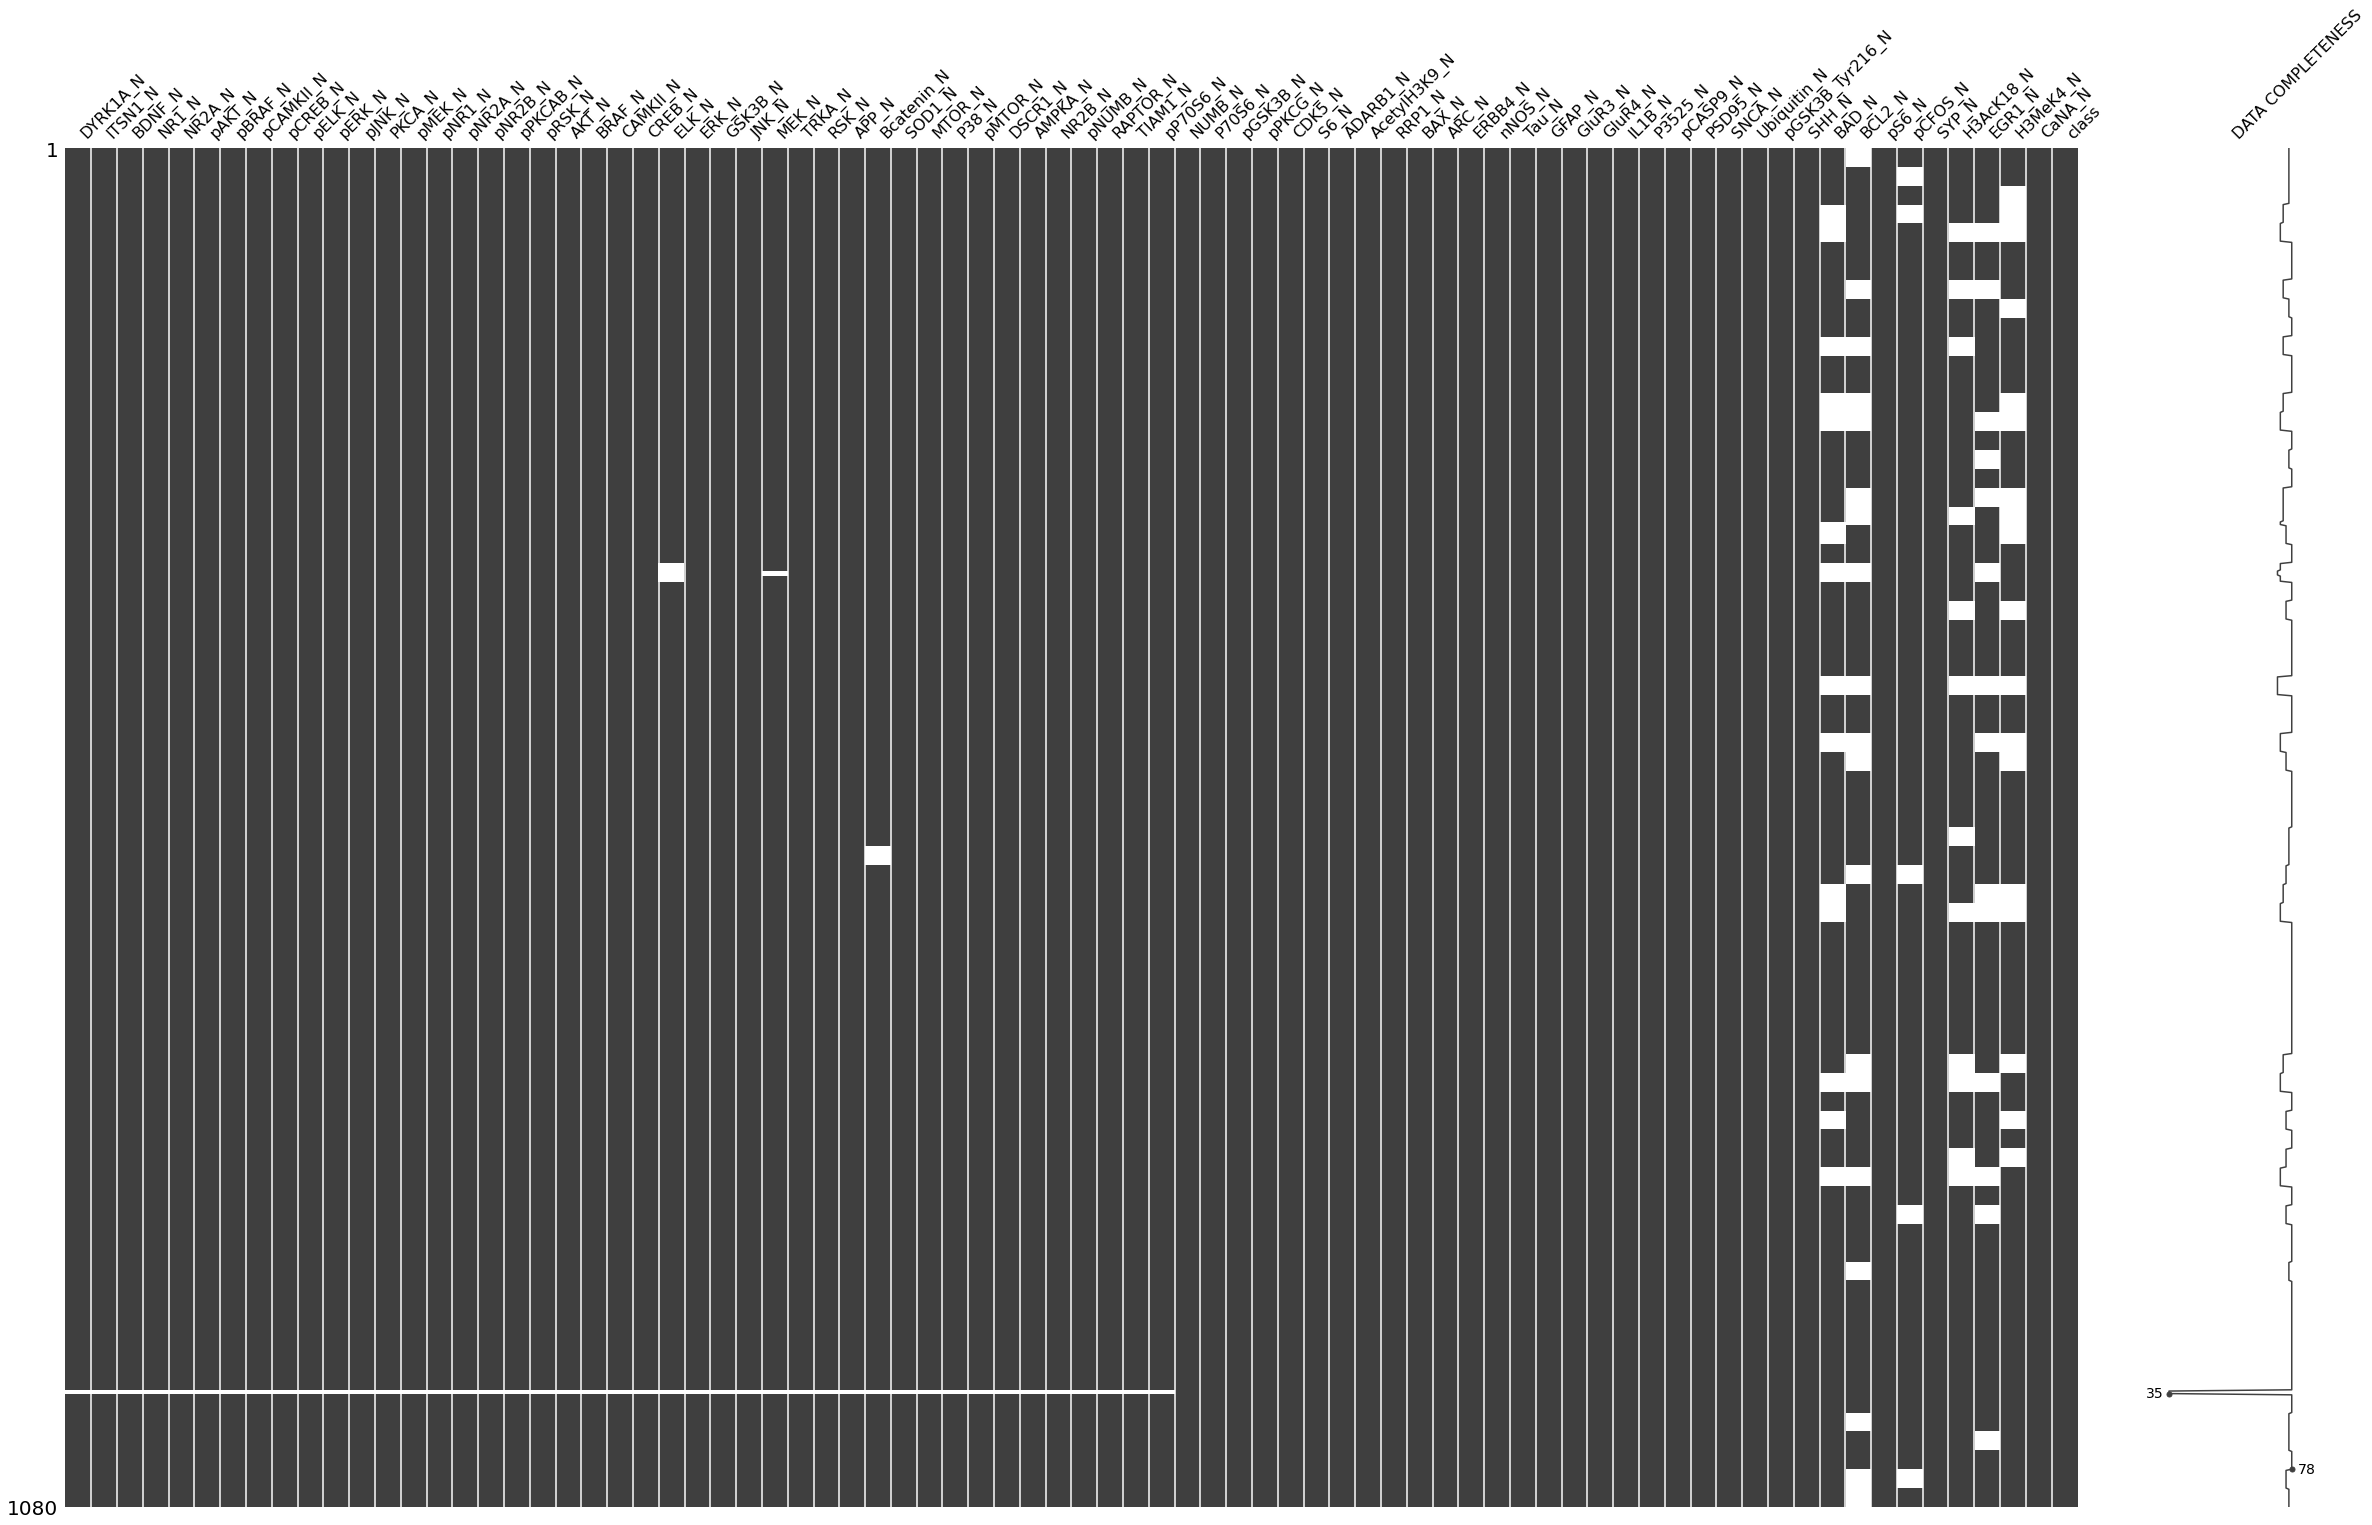

In [8]:
# Checking for missing values of features and labels if exist
missingno.matrix(data,labels=True,figsize=(40,25))
plt.show()

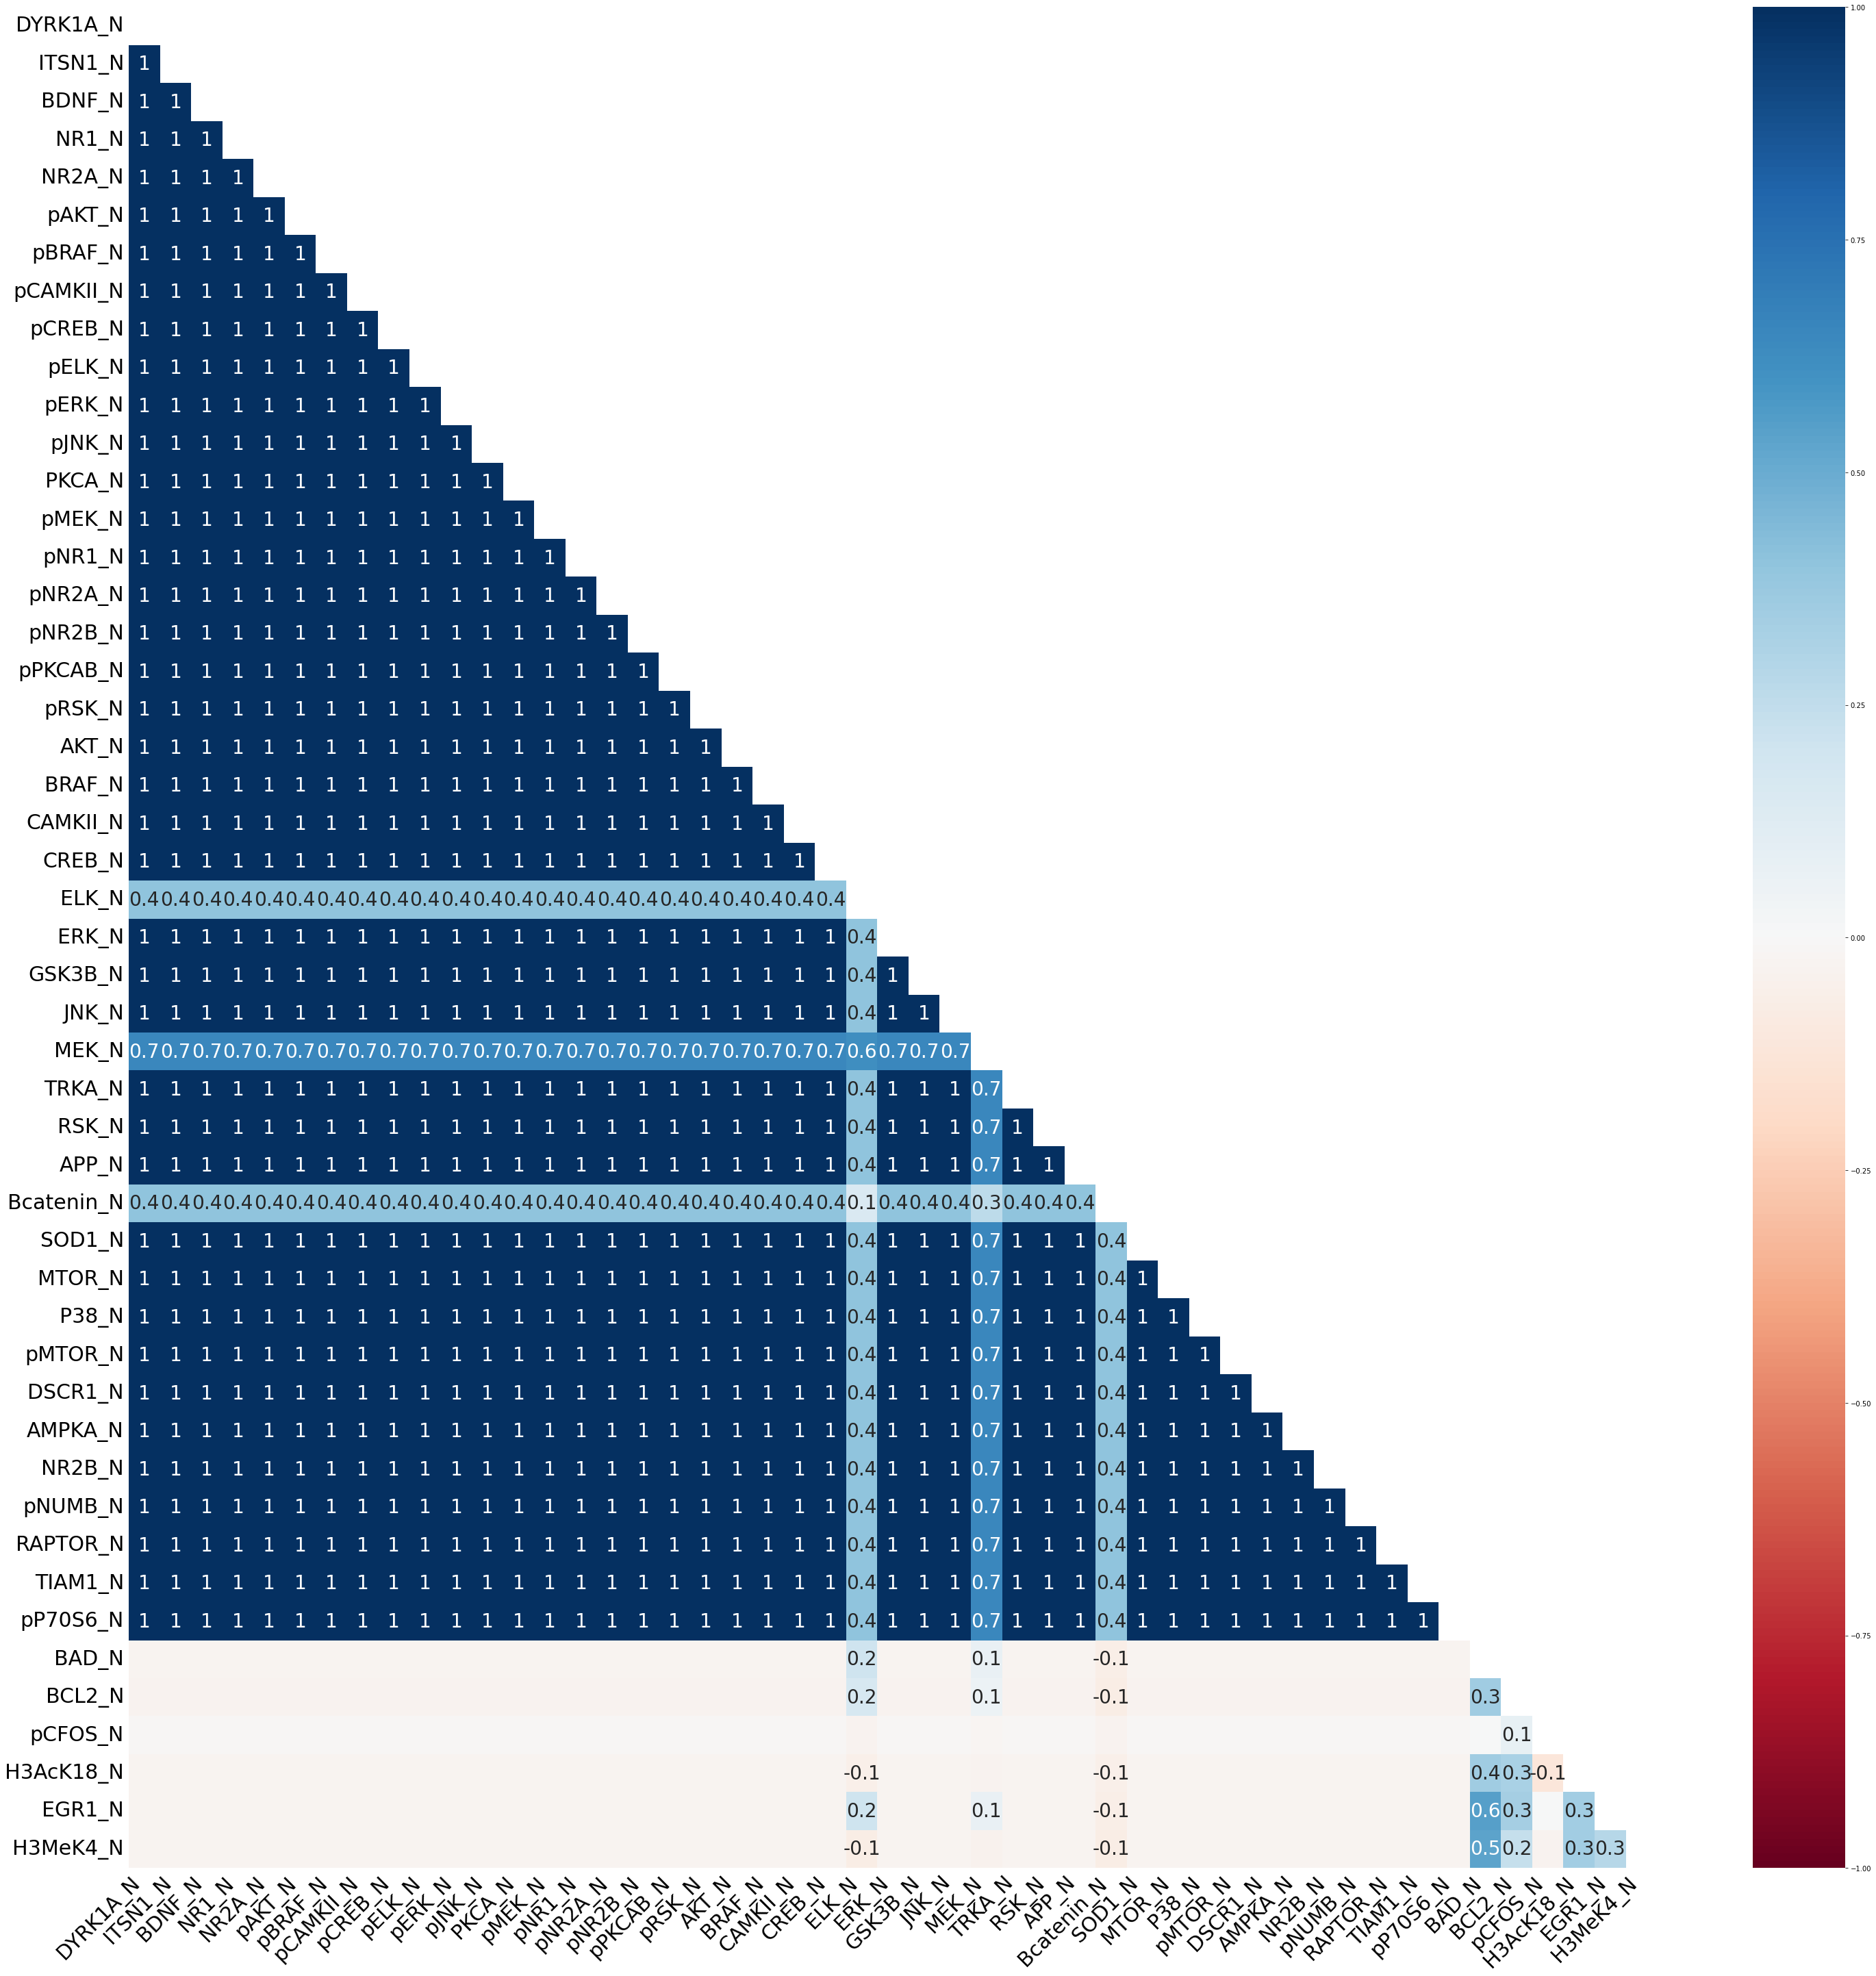

In [9]:
# Heatmap for correlation of null data between variables
missingno.heatmap(data,figsize=(50,50), fontsize=30)
plt.show()

From the plots above, majority of the variables have very small proportion of null values (i.e. less than 1%), which we can assume that the missing values of most variables are completely at random.

In [10]:
X = data.drop(['class'],axis=1)
y = data['class']

In [11]:
# Mean-median imputation
mean_impute_col = []
median_impute_col = []
for column in X.columns:
    if (X[column].skew() >-0.5) & (X[column].skew() <0.5):
        mean_impute_col.append(column) #Fairly symmetrical distributions
    else:
        median_impute_col.append(column) # Moderate to large skewness

imputer = fei.MeanMedianImputer('mean')
X[mean_impute_col] = imputer.fit_transform(X[mean_impute_col])

imputer = fei.MeanMedianImputer('median')
X[median_impute_col] = imputer.fit_transform(X[median_impute_col])

In [12]:
# Checking for gaussian distribution of numerical variables using anderson test
gaussian_columns = []
non_gaussian_columns = []
for column in X.columns:
    result = st.anderson(X[column])
    if result[0] > result[1][2]:
        non_gaussian_columns.append(column)
    else:
        gaussian_columns.append(column)
print(f"List of gaussian variables: {gaussian_columns}")
print(f"List of non-gaussian variables: {non_gaussian_columns}")

List of gaussian variables: ['NR1_N', 'pCREB_N', 'pNR2B_N', 'IL1B_N', 'P3525_N', 'Ubiquitin_N', 'SYP_N']
List of non-gaussian variables: ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N', 'GluR4_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']


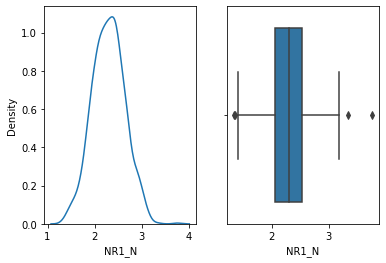

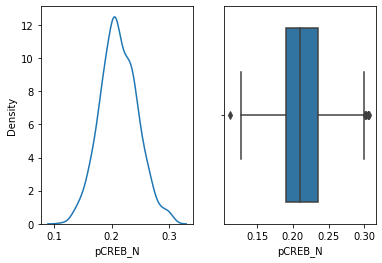

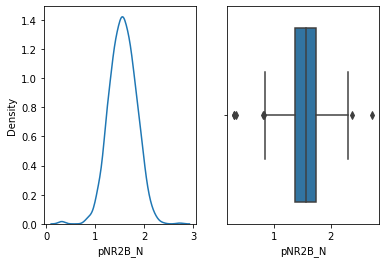

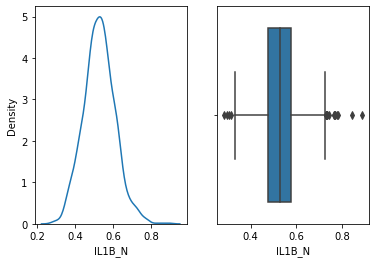

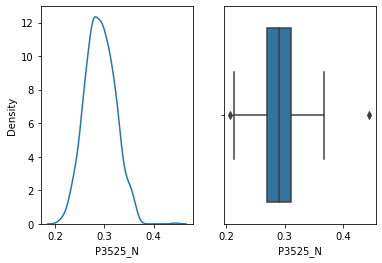

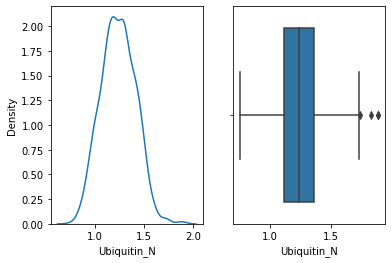

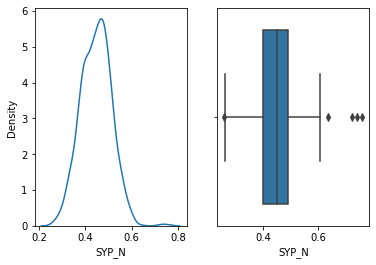

In [13]:
# Checking for outliers related to gaussian variables
for column in gaussian_columns:
    fig, ax = plt.subplots(1,2)
    sns.kdeplot(data=X, x=column, ax=ax[0])
    sns.boxplot(data=X, x=column, ax=ax[1])
    plt.show()

In [14]:
# Checking proportion of outliers for gaussian variables
outlier_prop = []
for column in gaussian_columns:
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = X[column].mean() - 3 * X[column].std()
    upper_bound = X[column].mean() + 3 * X[column].std()
    outlier_prop.append(np.round(len(X[(X[column] < lower_bound) | (X[column] > upper_bound)])/len(X),4))
results = pd.concat([pd.Series(X[gaussian_columns].columns),pd.Series(outlier_prop)],axis=1)\
            .rename({0:'Variable',1:'Prop_Outliers'},axis=1)
results.sort_values(by='Prop_Outliers',ascending=False)

,Variable,Prop_Outliers
2,pNR2B_N,0.0046
3,IL1B_N,0.0037
5,Ubiquitin_N,0.0028
6,SYP_N,0.0028
0,NR1_N,0.0019
1,pCREB_N,0.0009
4,P3525_N,0.0009


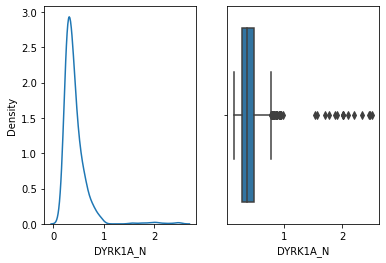

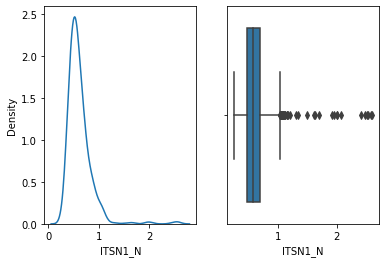

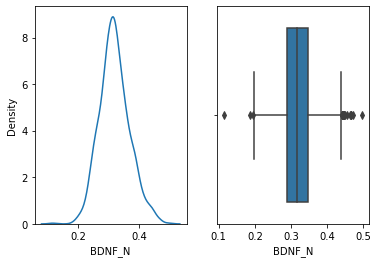

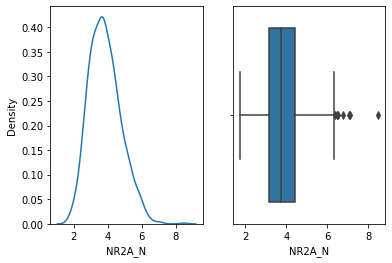

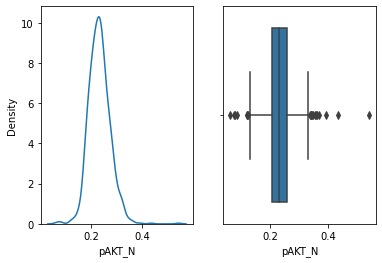

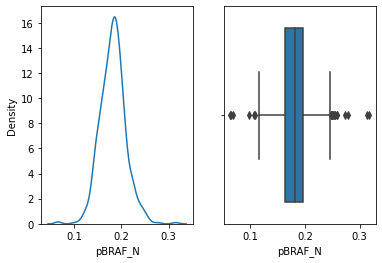

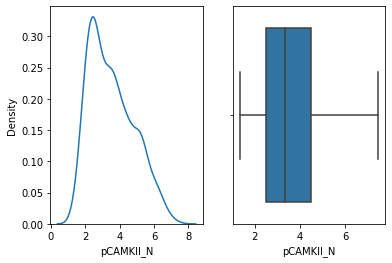

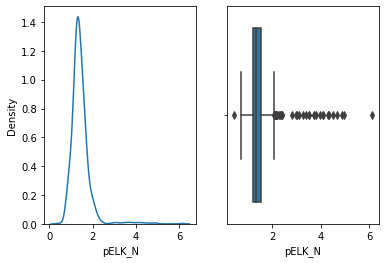

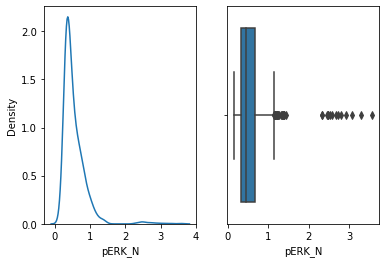

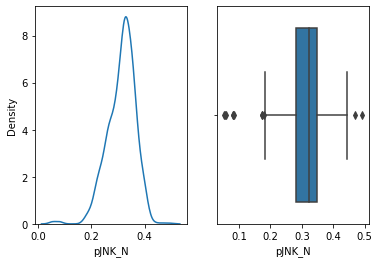

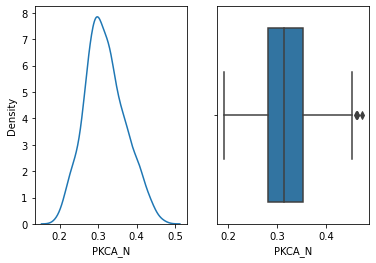

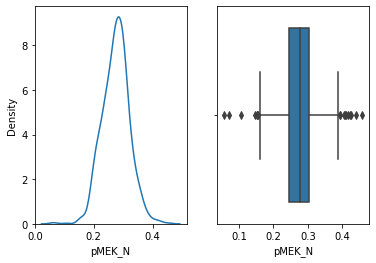

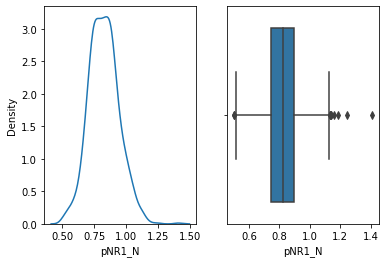

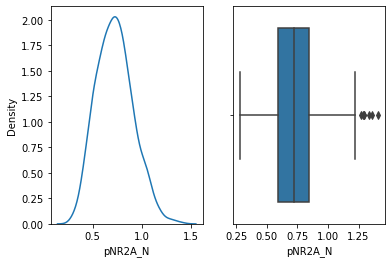

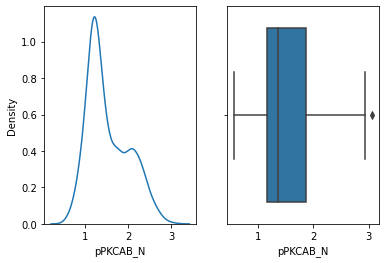

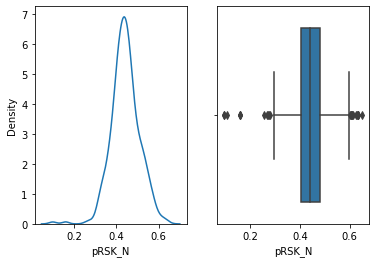

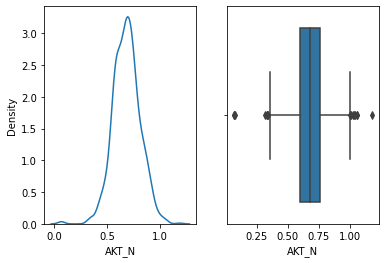

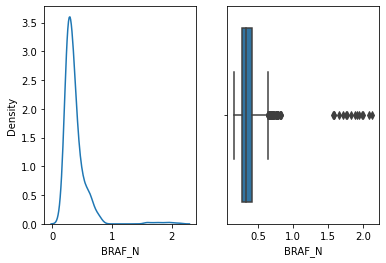

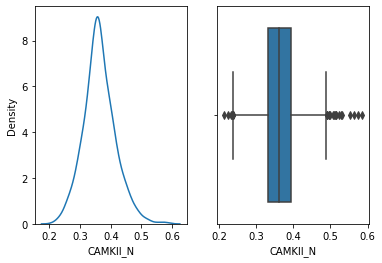

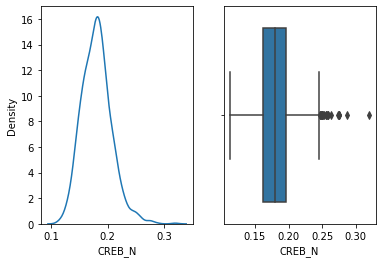

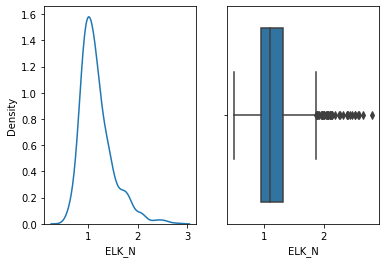

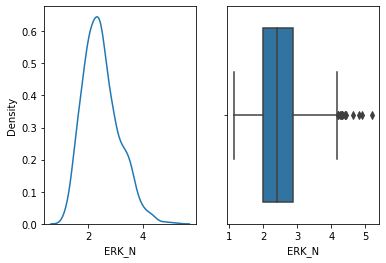

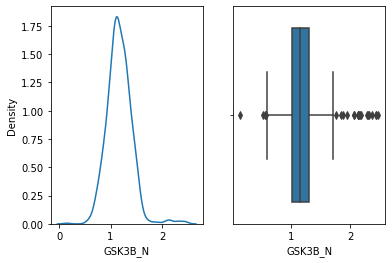

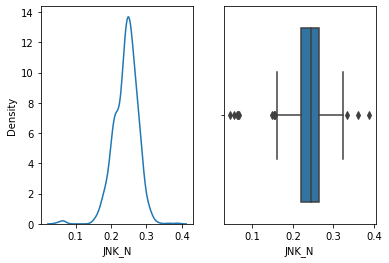

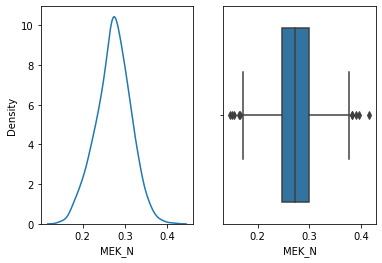

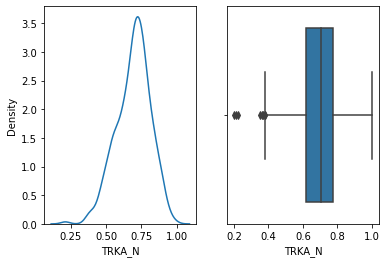

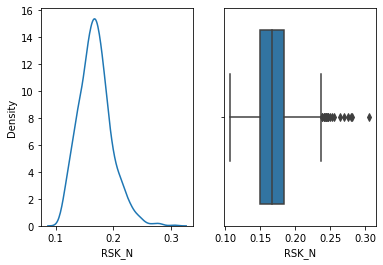

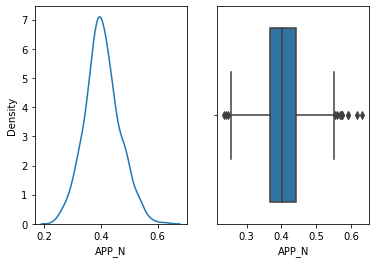

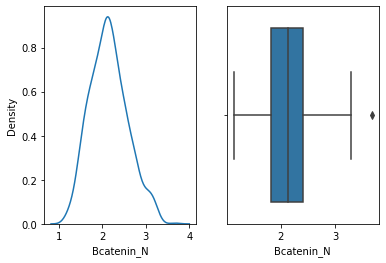

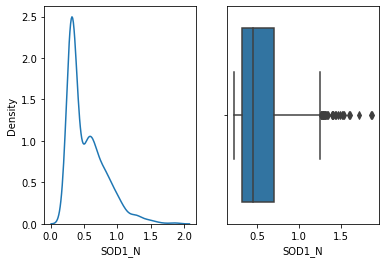

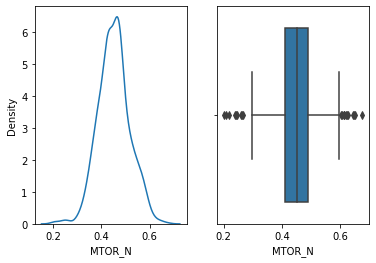

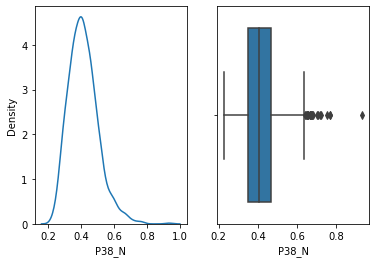

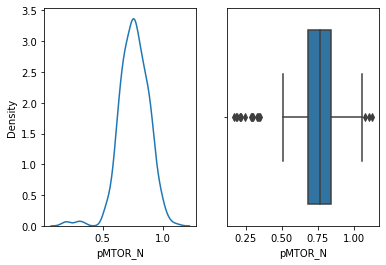

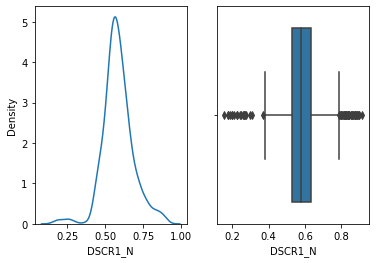

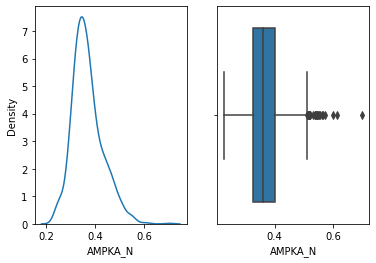

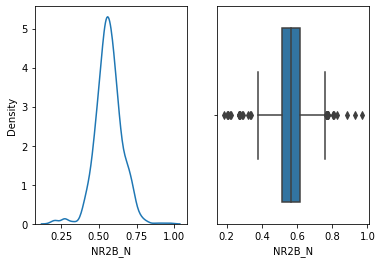

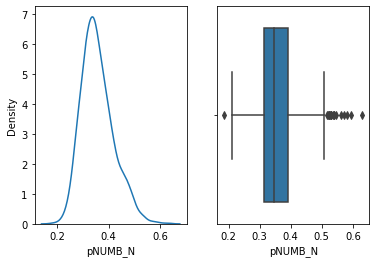

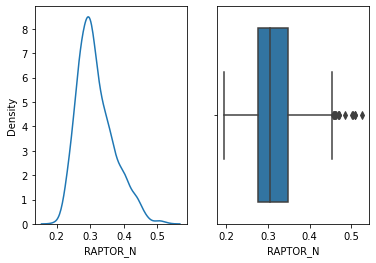

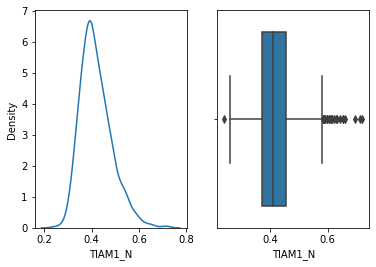

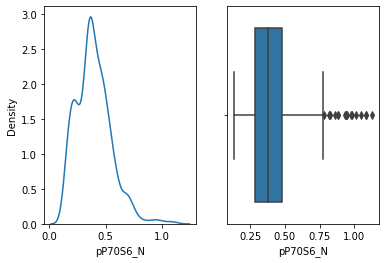

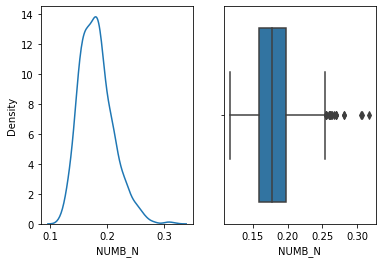

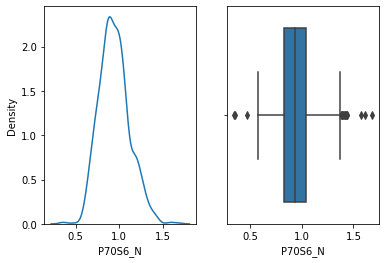

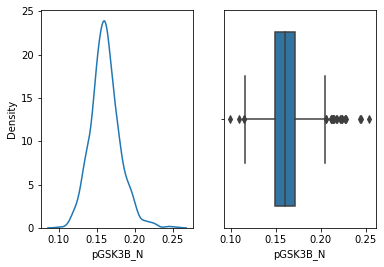

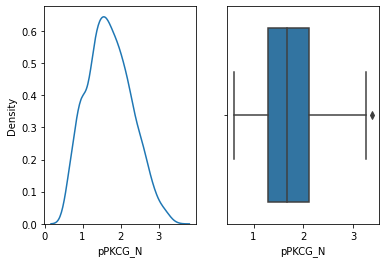

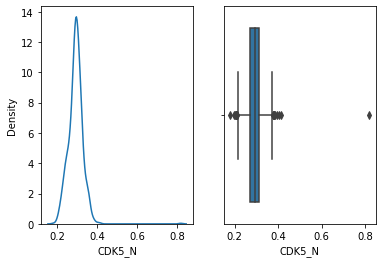

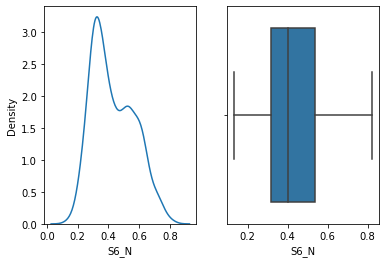

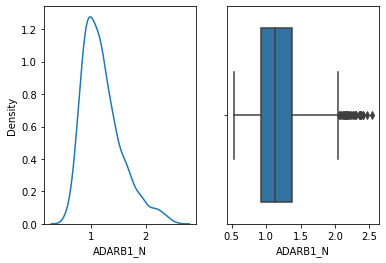

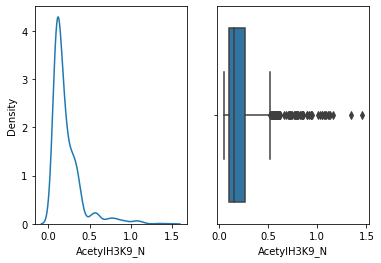

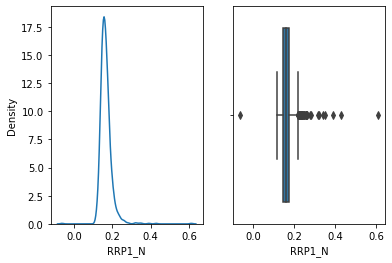

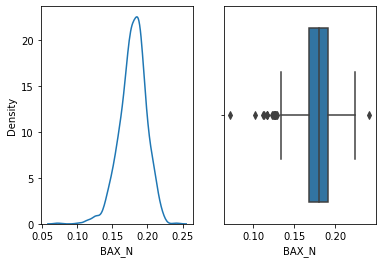

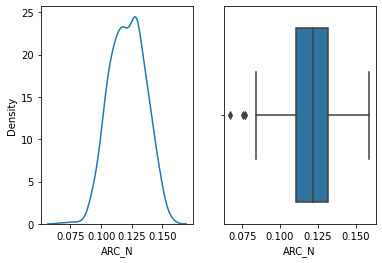

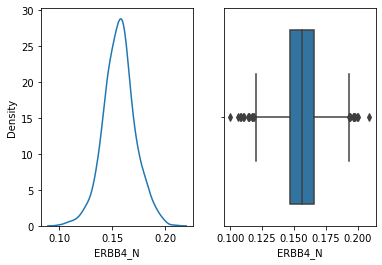

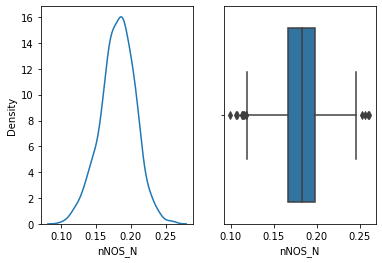

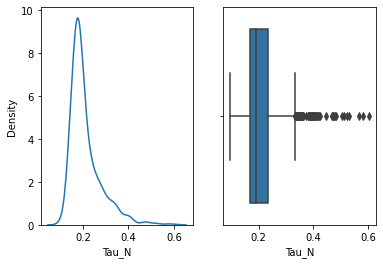

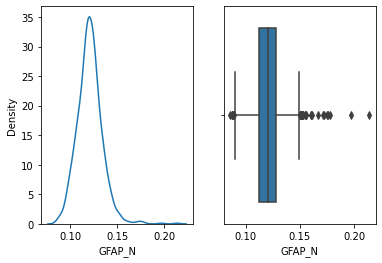

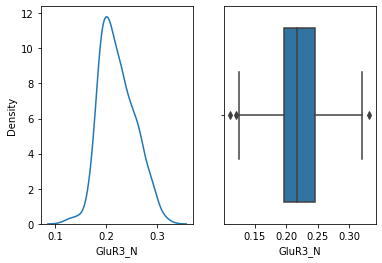

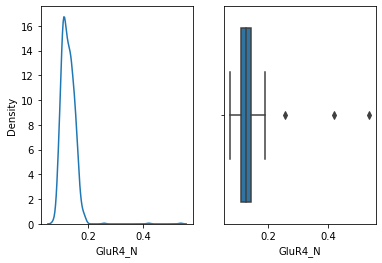

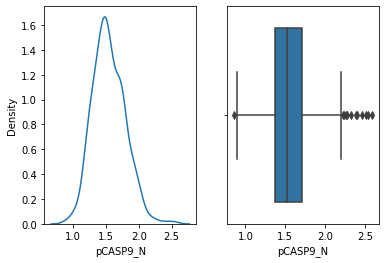

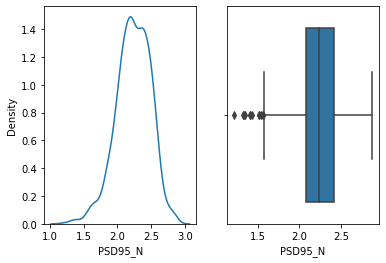

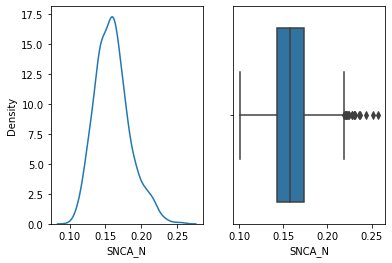

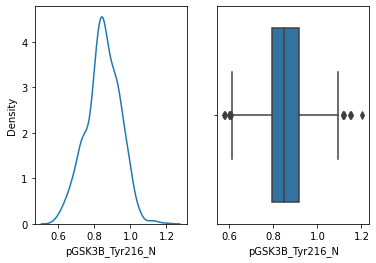

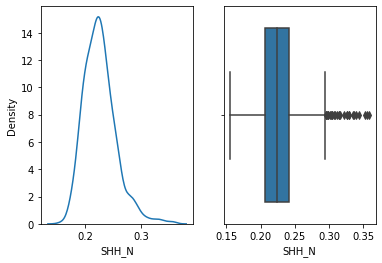

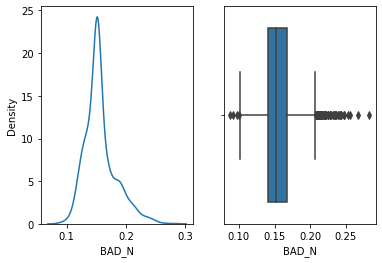

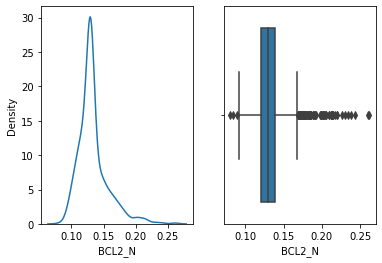

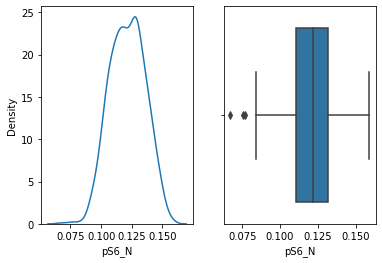

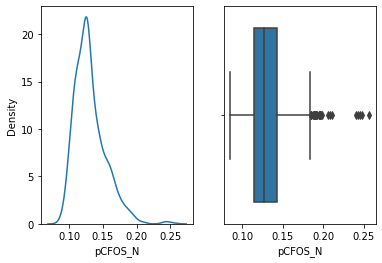

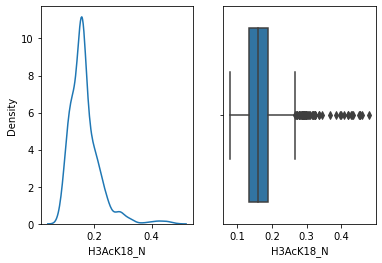

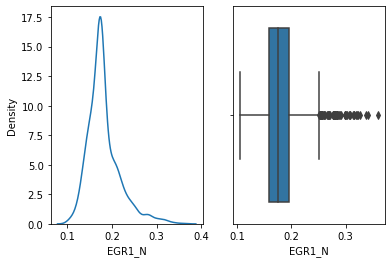

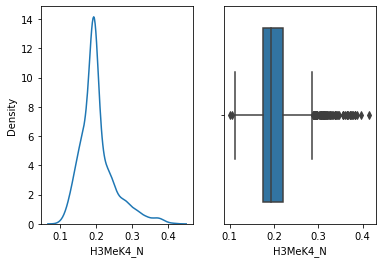

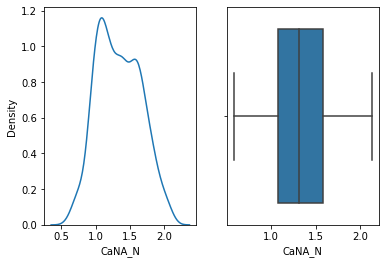

In [15]:
# Checking for outliers related to non-gaussian variables
for column in non_gaussian_columns:
    fig, ax = plt.subplots(1,2)
    sns.kdeplot(data=X, x=column, ax=ax[0])
    sns.boxplot(data=X, x=column, ax=ax[1])
    plt.show()

In [16]:
# Checking proportion of outliers for non-gaussian variables
outlier_prop = []
for column in non_gaussian_columns:
    Q1 = X[column].quantile(0.25)
    Q3 = X[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_prop.append(np.round(len(X[(X[column] < lower_bound) | (X[column] > upper_bound)])/len(X),4))
results = pd.concat([pd.Series(X[non_gaussian_columns].columns),pd.Series(outlier_prop)],axis=1)\
            .rename({0:'Variable',1:'Prop_Outliers'},axis=1)
results.sort_values(by='Prop_Outliers',ascending=False)

,Variable,Prop_Outliers
63,BCL2_N,0.0870
68,H3MeK4_N,0.0713
47,AcetylH3K9_N,0.0704
53,Tau_N,0.0676
17,BRAF_N,0.0657
62,BAD_N,0.0620
33,DSCR1_N,0.0537
67,EGR1_N,0.0519
66,H3AcK18_N,0.0500
0,DYRK1A_N,0.0444


Given proportion of outliers is small (less than 10%) for both gaussian and non-gaussian variables, outliers can be treated by capping it at extreme value bounds. Note that removing outliers may not be suitable for this scenario, given the size of dataset is small.

In [17]:
# Capping extreme outliers using 3*std for gaussian columns
winsorizer = feo.Winsorizer(capping_method='gaussian', tail='both', fold=3, add_indicators=False, variables=gaussian_columns)
X = winsorizer.fit_transform(X)

# Capping extreme outliers using 1.5*IQR for non-gaussian columns
winsorizer = feo.Winsorizer(capping_method='iqr', tail='both', fold=1.5, add_indicators=False, variables=non_gaussian_columns)
X = winsorizer.fit_transform(X)

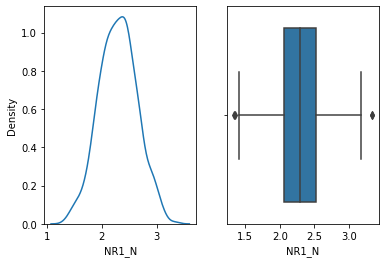

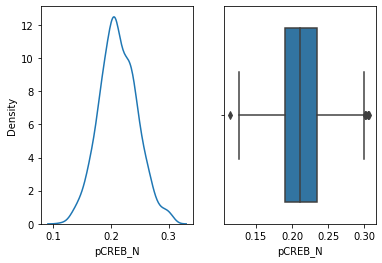

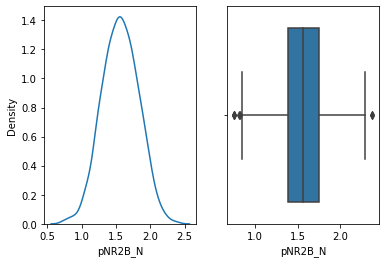

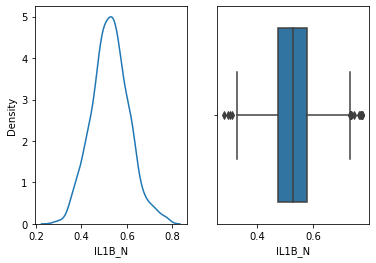

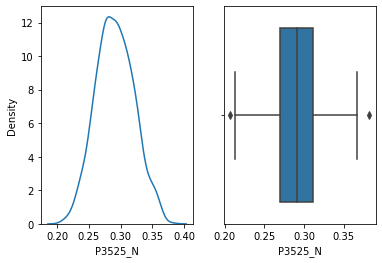

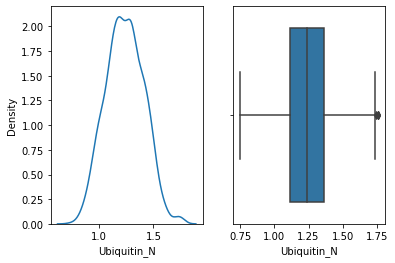

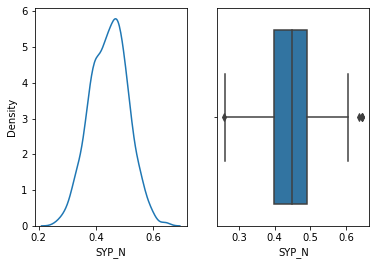

In [18]:
# Checking for outliers related to gaussian variables
for column in gaussian_columns:
    fig, ax = plt.subplots(1,2)
    sns.kdeplot(data=X, x=column, ax=ax[0])
    sns.boxplot(data=X, x=column, ax=ax[1])
    plt.show()

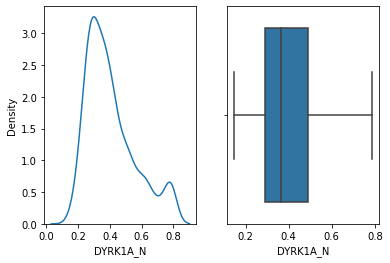

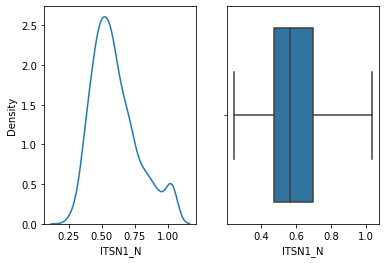

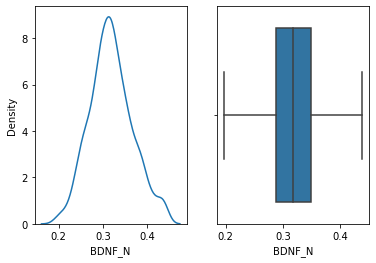

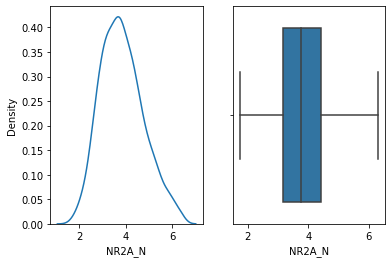

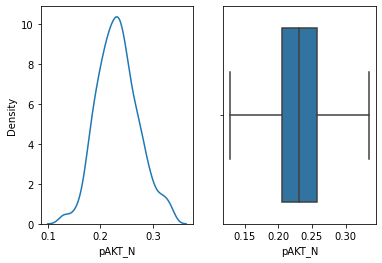

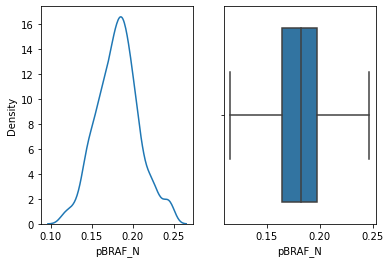

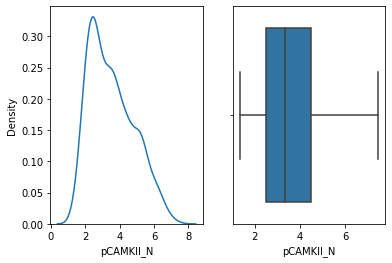

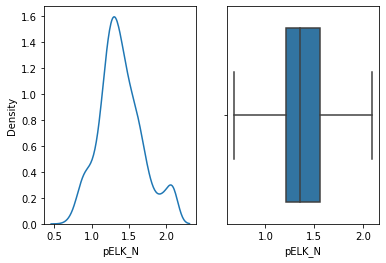

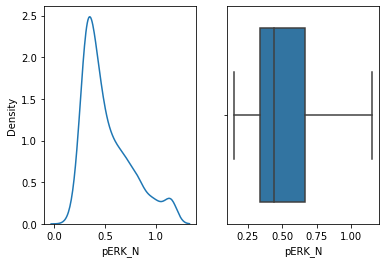

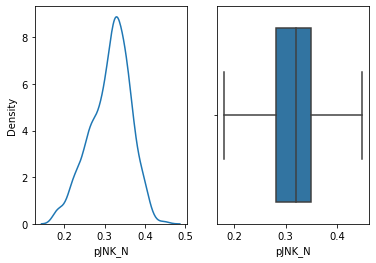

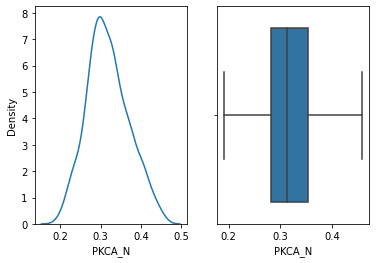

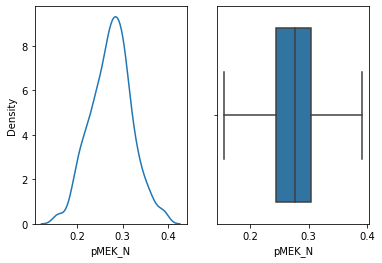

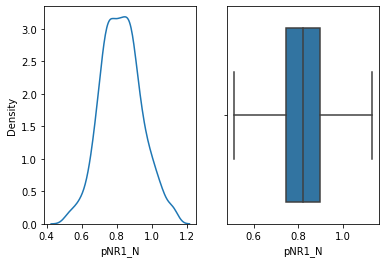

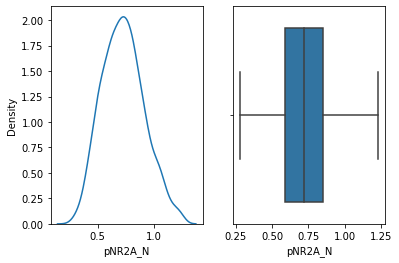

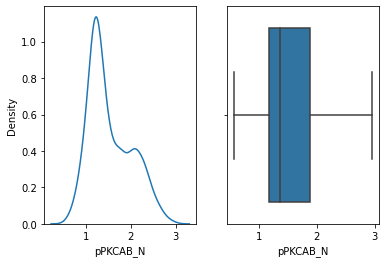

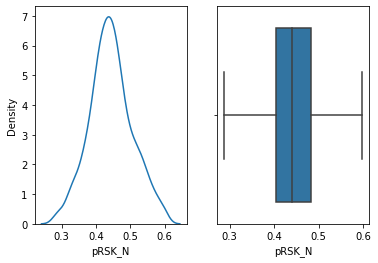

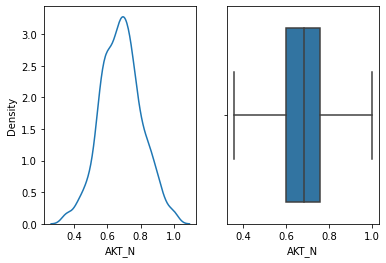

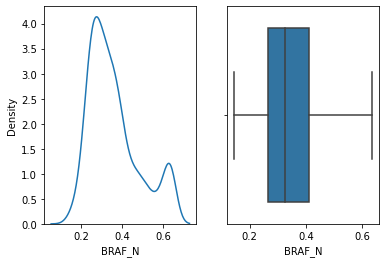

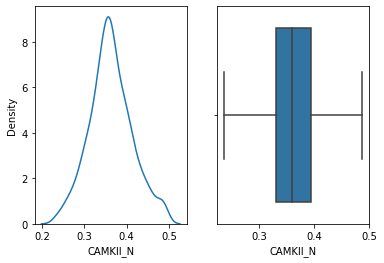

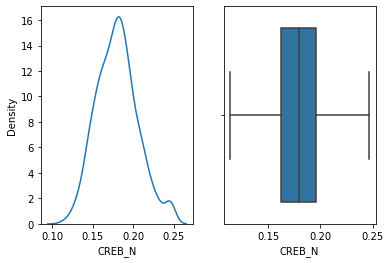

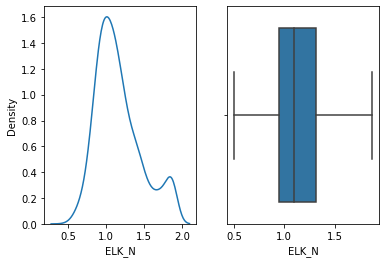

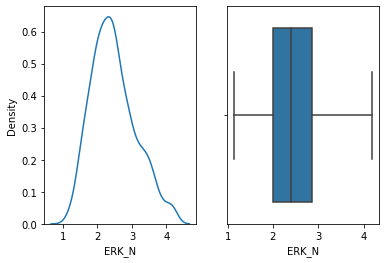

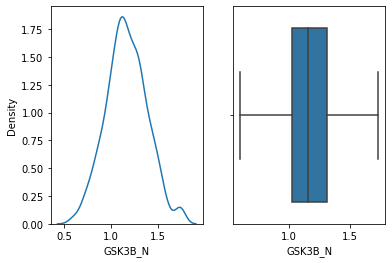

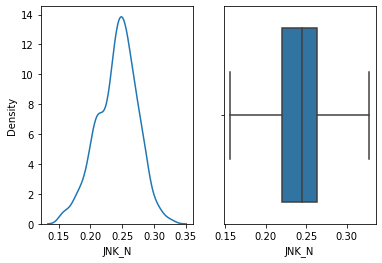

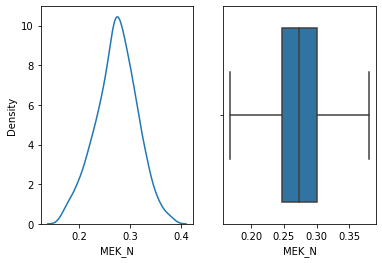

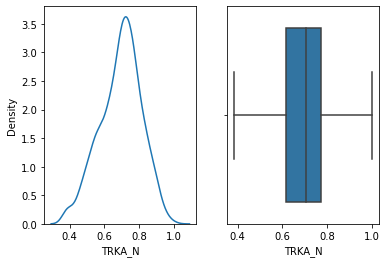

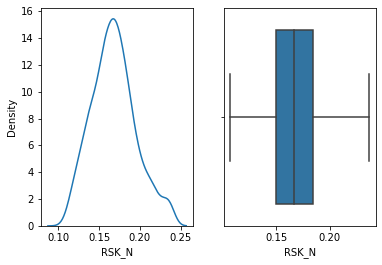

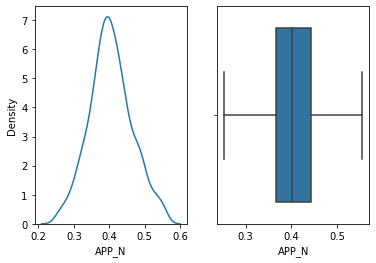

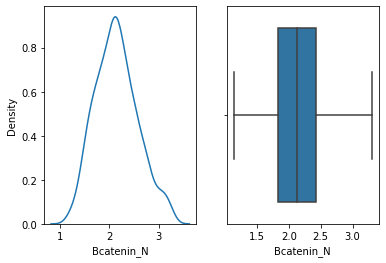

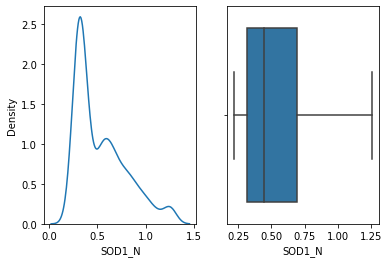

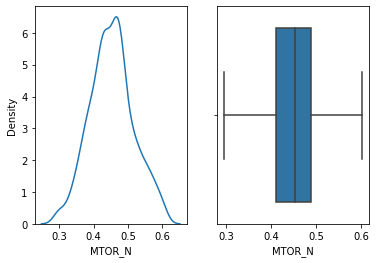

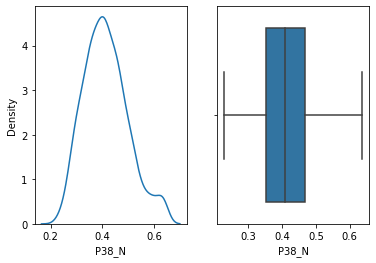

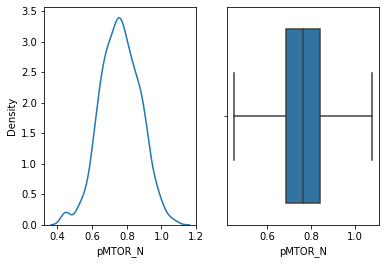

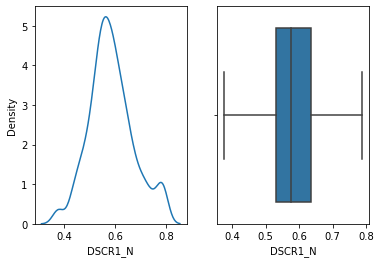

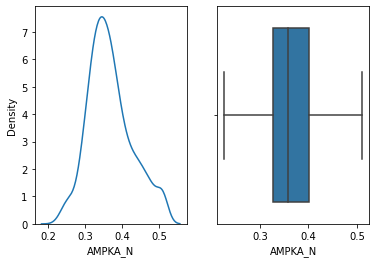

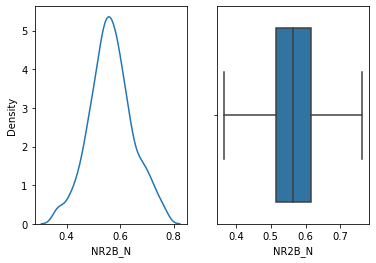

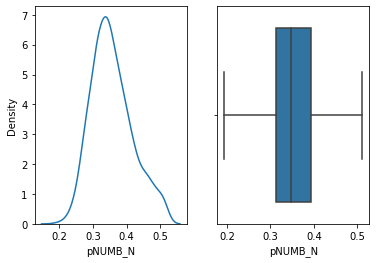

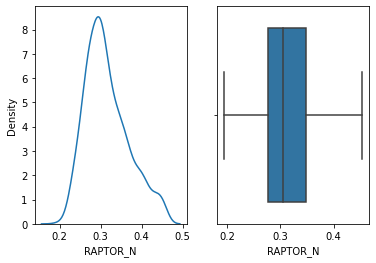

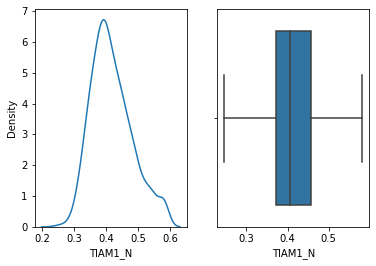

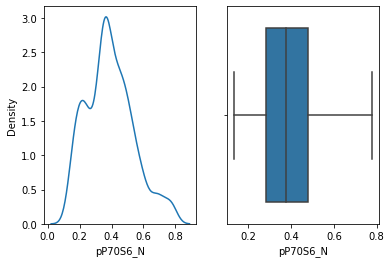

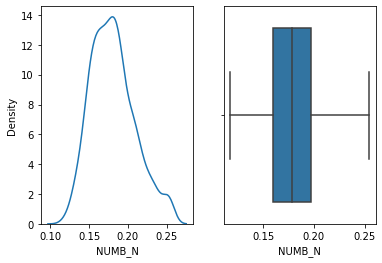

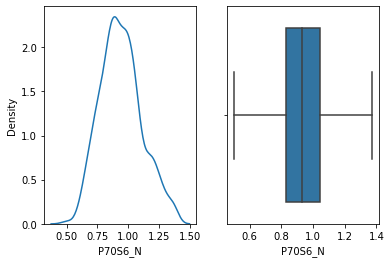

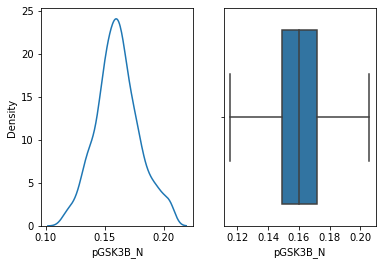

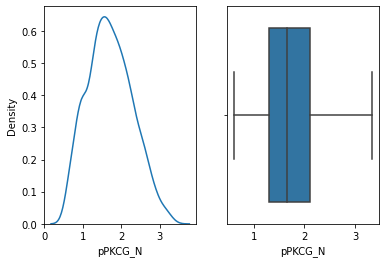

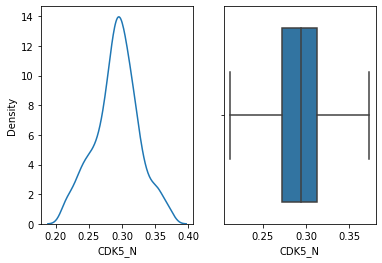

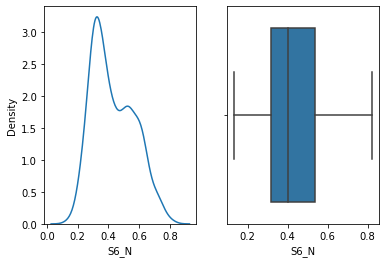

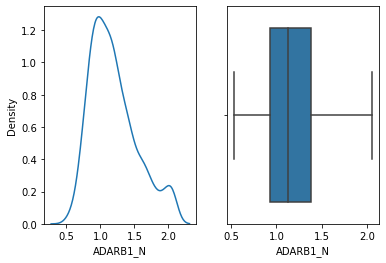

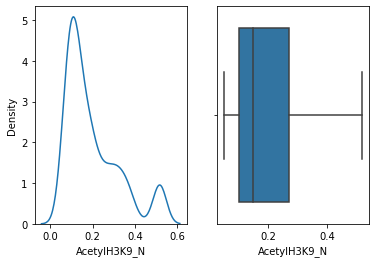

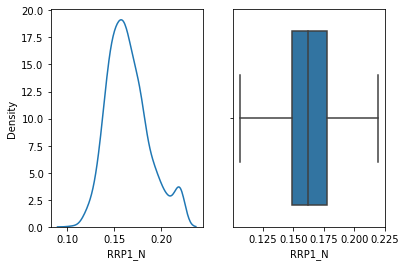

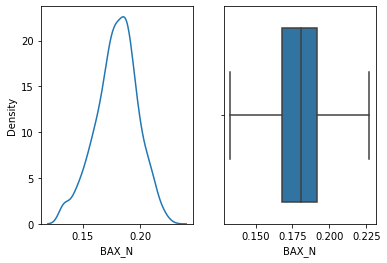

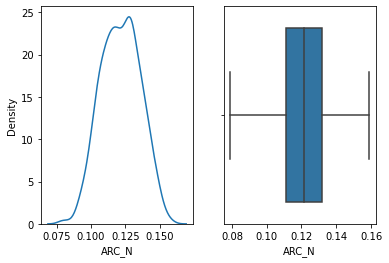

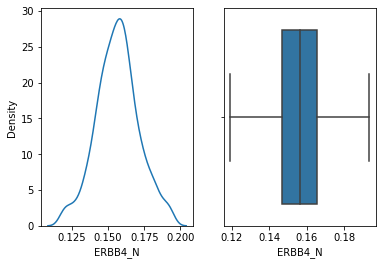

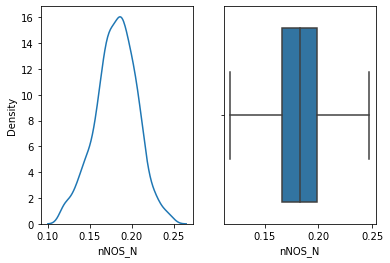

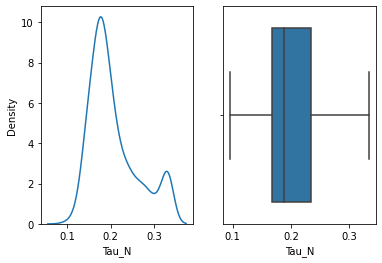

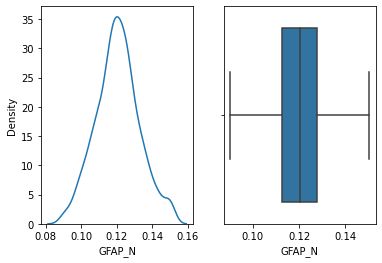

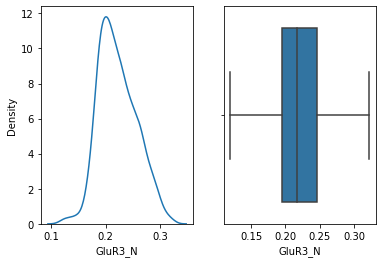

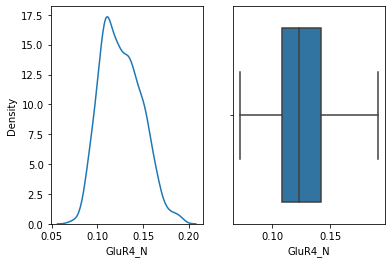

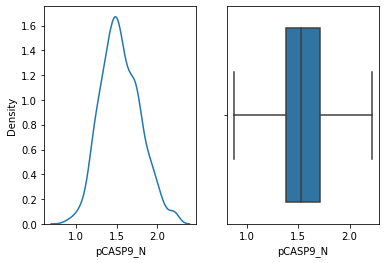

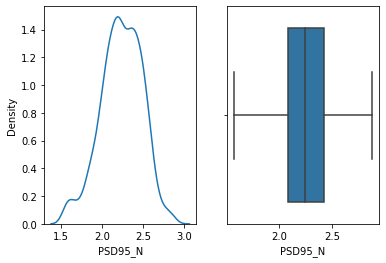

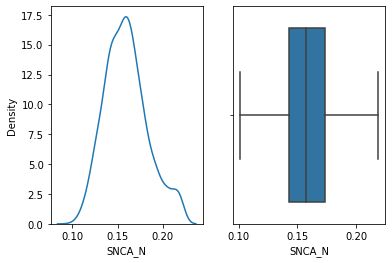

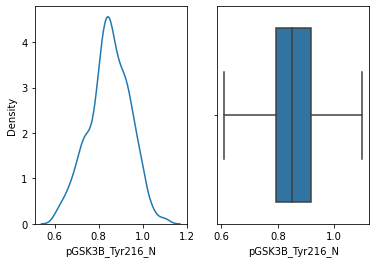

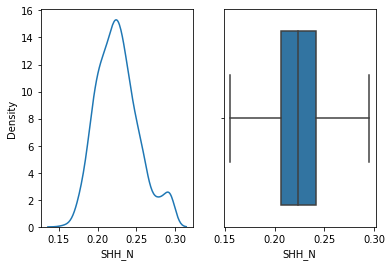

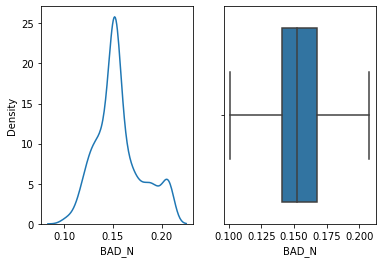

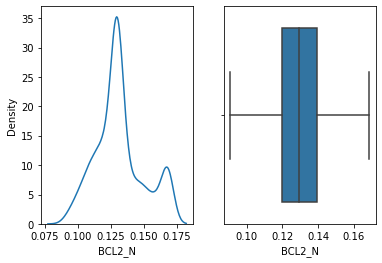

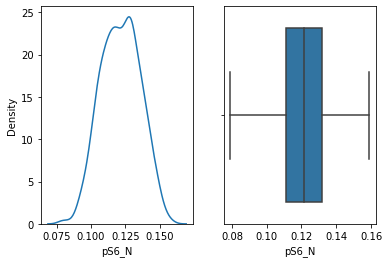

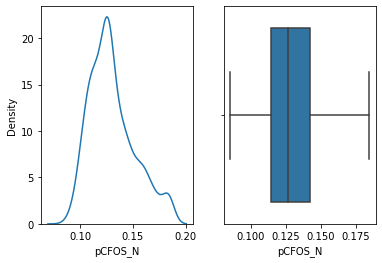

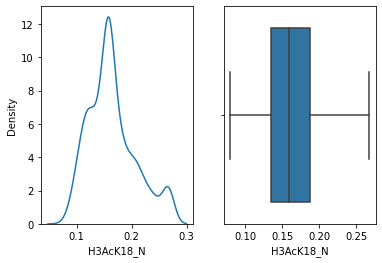

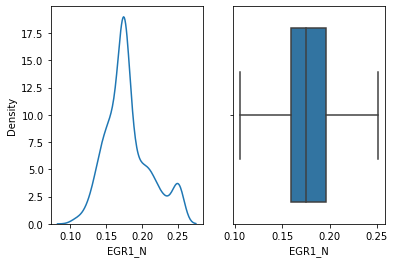

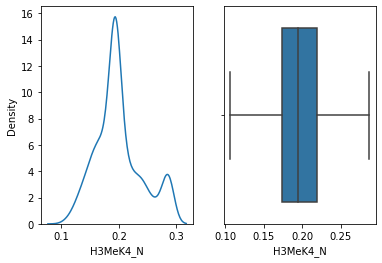

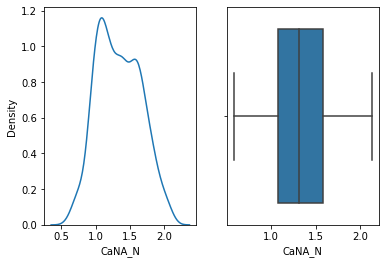

In [19]:
# Checking for outliers related to non-gaussian variables
for column in non_gaussian_columns:
    fig, ax = plt.subplots(1,2)
    sns.kdeplot(data=X, x=column, ax=ax[0])
    sns.boxplot(data=X, x=column, ax=ax[1])
    plt.show()

## K Means Clustering

In K means clustering, the value of K represents the number of centroid points that form given clusters, which requires hyperparameter tuning.

<img src="https://editor.analyticsvidhya.com/uploads/46668k-means-clustering-algorithm-in-machine-learning.png">

K means clustering is mostly suitable for large datasets

<b>Assumptions of K Means Clustering</b>:
1. Clusters are spherical
2. Clusters are of similar size

<b>Advantages of K Means Clustering:</b>
1. Computationally faster for smaller values of K
2. Clusters formed are more tight and precise
3. Scalable to large datasets

<b>Disadvantages of K Means Clustering:</b>
1. K value requires manual selection and hyperparameter tuning
2. Unable to cluster data with various size and density
3. Sensitive to outliers

<b>Requirement of feature scaling: Yes</b>

<b>Robust to outliers: No</b>

The following steps are involved in K means clustering:

1. Initialize K number of centroids at random (Note that centroids need to be far enough initially for clusters to be identified accordingly - resolved using K means ++ in sklearn)


2. Compute Euclidean distance for every point of interest to determine closest centroid point to assign to


3. Compute average of all points similar to centroid point to update the location of centroid point


4. Steps 2 and 3 are repeated until no more points are reassigned to new centroid points based on convergence criterion where:
- Centroid points move less than certain percentage of smallest distance between different centroids
- Maximum iterations is reached

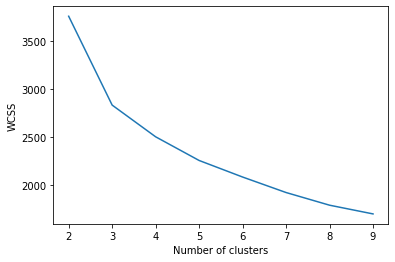

In [20]:
# Using elbow method to identify optimum value of K
kmeans = KMeans().fit(X)
wcss = [] 
for i in range(2, 10): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [21]:
kneeloc = KneeLocator(range(2,10), wcss, curve='convex', direction='decreasing')
kneeloc.knee

4

In [22]:
kmeans = KMeans(n_clusters=kneeloc.knee).fit(X)
y_kmeans = kmeans.fit_predict(X)
Counter(y_kmeans)

Counter({0: 270, 1: 328, 2: 302, 3: 180})

For n_clusters = 2 The average silhouette_score is : 0.2544196434901101


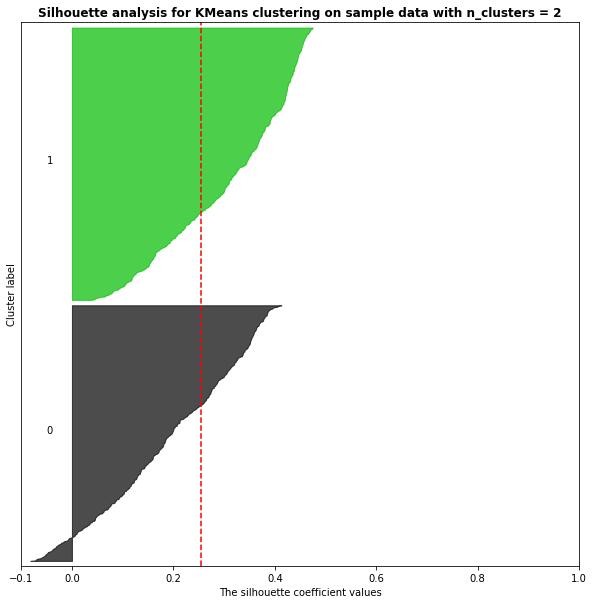

For n_clusters = 3 The average silhouette_score is : 0.2689672531785472


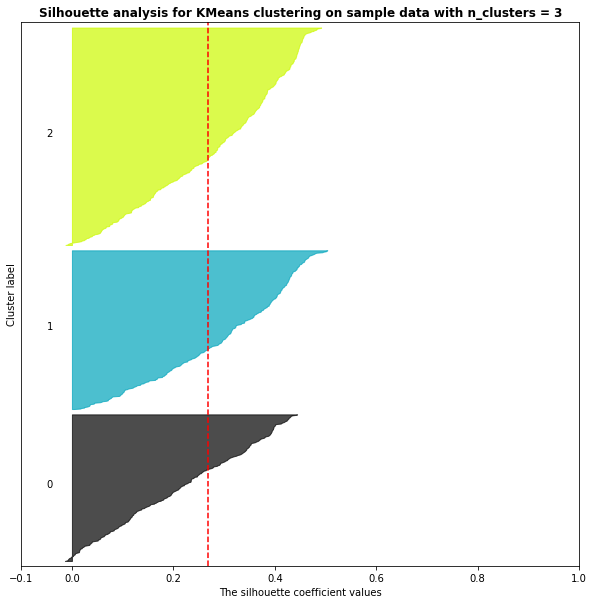

For n_clusters = 4 The average silhouette_score is : 0.21721808518962302


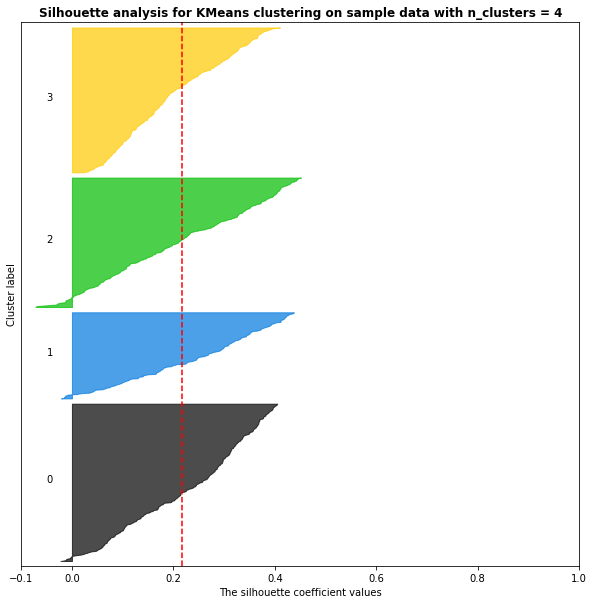

For n_clusters = 5 The average silhouette_score is : 0.199063974025238


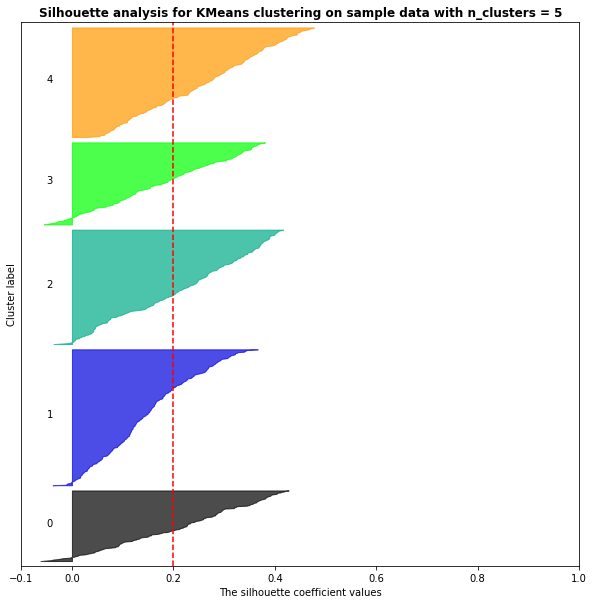

For n_clusters = 6 The average silhouette_score is : 0.2047899291406021


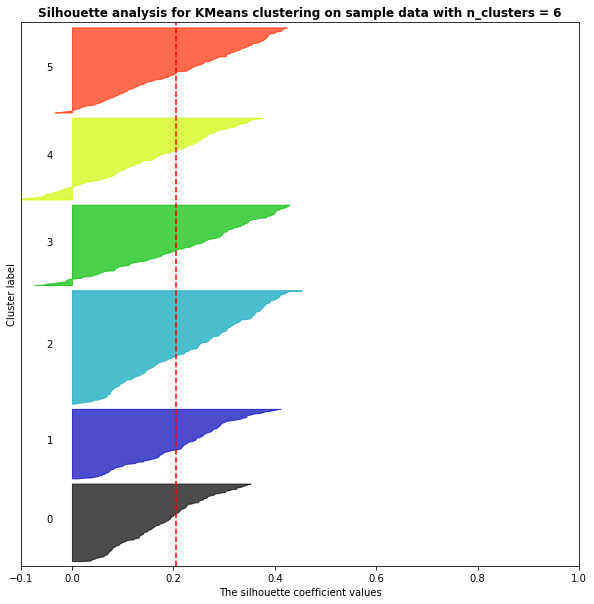

For n_clusters = 7 The average silhouette_score is : 0.2109089113812892


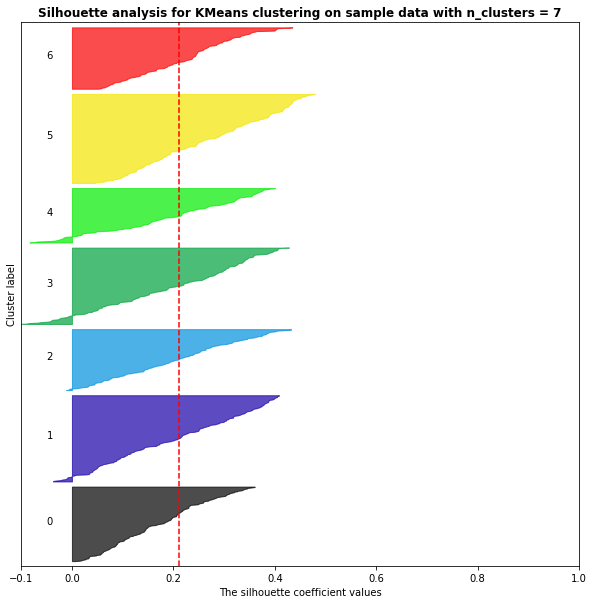

For n_clusters = 8 The average silhouette_score is : 0.20105975948510973


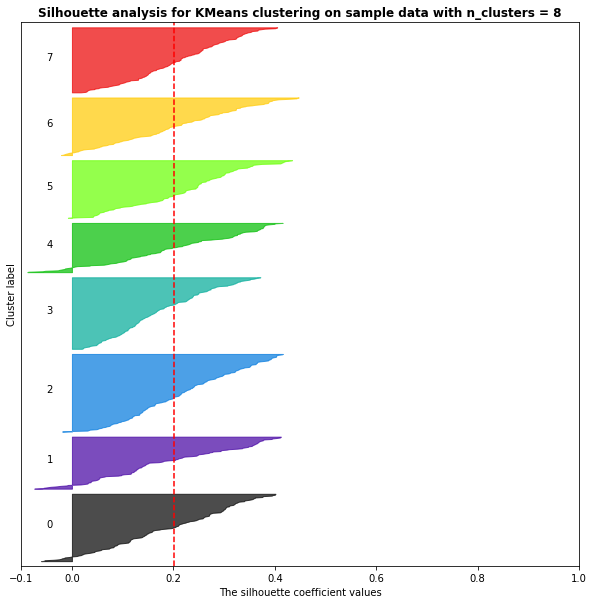

For n_clusters = 9 The average silhouette_score is : 0.20147395150527497


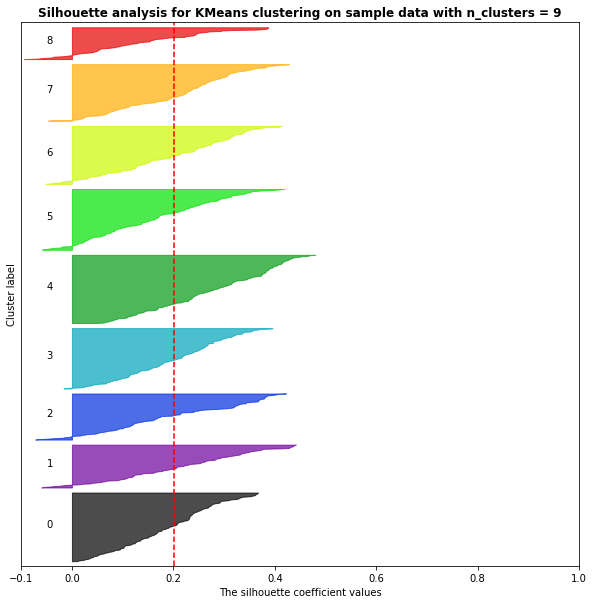

In [23]:
range_n_clusters = list(range(2,10))
for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10, 10)
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, 
    # to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples. This gives a perspective into the density 
    # and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels, random_state=42)
    
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the y axis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters, fontsize=12, fontweight="bold",
    )
    
    plt.show()

## Hierarchical Clustering

In hierarchical clustering, number of clusters do not need to be defined upfront under agglomerative approach.

<img src = "https://www.statisticshowto.com/wp-content/uploads/2016/11/clustergram.png">

Hierarchical clustering is mostly suitable for small datasets

The following steps are involved in hierarchical clustering:

1. From N number of data points where each data point is treated as a single cluster, combine 2 points with the nearest distance into one cluster.


2. Repeat the 1st step until a single cluster remains.

Note that the formation of clusters in hierarchical clustering can be visualized using a dendrogram, which does not require assumptions about the shape of clusters

<b>The optimum value of clusters is determined based on the dendrogram, which is the number of points passes through the longest vertical line that has no other horizontal lines passing through</b>

<b>Assumptions of hierarchical clustering: No assumptions required</b>

<b>Advantages of hierarchical clustering</b>:
1. No assumption about shape of clusters required
2. Cluster datasets at various levels of granularity upfront

<b>Disadvantages of hierarchical clustering</b>:
1. Manual checks required to determine optimum number of clusters to select
2. Computationally expensive for large datasets
3. Dendrogram becomes difficult to visualize on large datasets.
4. Unable to cluster data with various size and density
5. Sensitive to outliers

<b>Requirement of feature scaling: Yes</b>

<b>Robust to outliers: No</b>

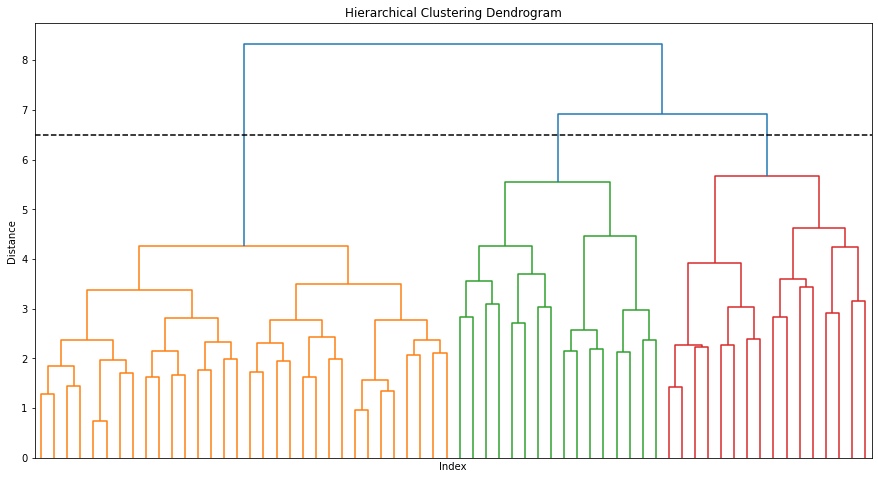

In [24]:
z = sch.linkage(X, method = "complete", metric = "euclidean")

# Dendrogram plot with viewing only first 5 levels since the dataset is very large
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z, orientation='top', no_labels=True, p=5, truncate_mode='level')
threshold = 6.5 #for hline
plt.axhline(y=threshold, c='k', linestyle='--')
plt.show()

In [25]:
hierclust = AgglomerativeClustering(n_clusters=3, linkage = 'complete', affinity = "euclidean").fit(X) 
y_hierclust = hierclust.fit_predict(X)
Counter(y_hierclust)

Counter({0: 482, 1: 276, 2: 322})

## DBSCAN Clustering

<img src = "https://miro.medium.com/max/627/1*yT96veo7Zb5QeswV7Vr7YQ.png" width="500">

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering is to form clusters of arbitrary shapes, which k-means and hierarchical clustering couldn't do.

<b>Terminologies of DBSCAN clustering</b>:

1. <b>Epsilon</b>: Radius of a cluster
2. <b>Min points</b>: Minimum number of points required within radius of cluster for centroid to be classified as "core point"
3. <b>Core points</b>: Centroid where there's at least n number of min points available within the cluster
4. <b>Border points</b>: Centroid where there's between 1 and n - 1 number of min points available within the cluster
5. <b>Noise points</b>: Centroid where there's no points available within the cluster.

Unlike K-means and hierarchical clustering, DBSCAN clustering is able to detect noise in the dataset.

<b>Advantages of DBSCAN Clustering:</b>
1. Does not require specifying number of clusters upfront
2. Able to identify noise data when clustering
3. Able to find arbitrary size and shaped clusters

<b>Disadvantages of DBSCAN Clustering:</b>
1. Does not work well on high-dimensional data
2. Unable to cluster datasets with large difference in density

<b>Requirement of feature scaling: Yes</b>

<b>Robust to outliers: Yes</b>

In [26]:
# DBScan Clustering with default hyperparameters
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)
y_dbscan = dbscan.fit_predict(X)
Counter(y_dbscan)

Counter({-1: 927,
         0: 5,
         1: 6,
         2: 5,
         3: 16,
         4: 6,
         5: 5,
         6: 5,
         7: 5,
         8: 6,
         9: 5,
         10: 6,
         11: 11,
         12: 6,
         13: 5,
         14: 6,
         15: 5,
         16: 6,
         17: 5,
         18: 6,
         19: 5,
         20: 6,
         21: 5,
         22: 5,
         23: 12})

In [27]:
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
silhouette_avg = silhouette_score(X, labels, random_state=42)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette score: %0.3f" % silhouette_avg)

Estimated number of clusters: 24
Estimated number of noise points: 927
Silhouette score: -0.362


In [28]:
range_eps = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
min_samples = list(range(5,20))

eps_value = []
min_samples_value = []
avg_score = []
num_clusters = []

for i in range_eps:
    for j in min_samples:
        try:
            dbscan = DBSCAN(eps=i, min_samples=j).fit(X)
            labels = dbscan.labels_
            silhouette_avg = silhouette_score(X, labels, random_state=42)
            eps_value.append(i)
            min_samples_value.append(j)
            avg_score.append(silhouette_avg)
            num_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))
        except:
            continue

results = pd.concat([pd.Series(eps_value,name='EPS'),pd.Series(min_samples_value,name='Min_Samples'),
                    pd.Series(avg_score,name='Average Silhouette Score'),pd.Series(num_clusters,name='Number_Clusters')],axis=1)
results.sort_values(by='Average Silhouette Score',ascending=False)

,EPS,Min_Samples,Average Silhouette Score,Number_Clusters
68,1.0,17,0.080377,2
66,1.0,15,0.039170,3
61,1.0,10,0.039126,4
67,1.0,16,0.029591,3
69,1.0,18,0.027445,3
62,1.0,11,-0.006177,5
70,1.0,19,-0.025394,4
63,1.0,12,-0.034787,6
13,0.7,5,-0.056009,62
49,0.9,13,-0.064215,6


In [29]:
# DBScan Clustering with best hyperparameters based on silhouette score
dbscan = DBSCAN(eps=1, min_samples=17).fit(X)
y_dbscan = dbscan.fit_predict(X)
Counter(y_dbscan)

Counter({-1: 487, 0: 232, 1: 361})

In [30]:
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
silhouette_avg = silhouette_score(X, labels, random_state=42)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette score: %0.3f" % silhouette_avg)

Estimated number of clusters: 2
Estimated number of noise points: 487
Silhouette score: 0.080


## Silhouette Analysis

For validating number of clusters in a given clustering algorithm, Silhouette analysis is used to study separation of distance between points in different clusters.

Steps for computing silhouette coefficients:

1. Compute average of distance between current point of interest and all other points within the same cluster.

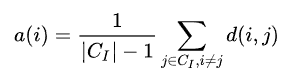

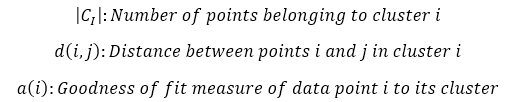

- <b>Note that the smaller the value of a(i), the better the assignment of point to its cluster</b>

2. Compute average of distance between current point of interest and all other points within a given neighboring cluster.

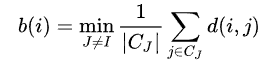

- <b>Note that the larger the value of b(i), the worse the assignment of point to its neighboring cluster</b>

3. Compute silhouette score for current point of interest using the following formula:

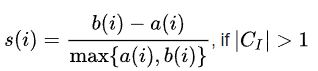

Silhouette coefficients/scores range between -1 to +1 with the following interpretation:
- 1: Sample is far away from neighboring clusters (very good clustering algorithm)
- Close to 0: Sample is close to decision boundary between two neighboring clusters (Average clustering algorithm)
- -1: Sample might have been assigned to the wrong cluster (Bad clustering algorithm)

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_001.png">

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_002.png">

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_silhouette_analysis_003.png">

From the example above, 4 clusters is considered optimum, because it has a good silhouette score of around 0.65 with little to no negative silhouette coefficients.

<b>Note that the silhouette plots above can be used to visualize values of silhouette coefficients for every sample and ideally silhouette score should be closer to 1 with little to no negative silhouette coefficients.</b>

